In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import missingno as mns
%matplotlib inline

In [3]:
df = pd.read_csv('credit-g.csv')
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [4]:
#1. Perform a good cleaning on the dataset

In [105]:
error = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([error, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
class,0,0.0
other_parties,0,0.0
duration,0,0.0
credit_history,0,0.0
purpose,0,0.0
credit_amount,0,0.0
savings_status,0,0.0
employment,0,0.0
installment_commitment,0,0.0
personal_status,0,0.0


In [106]:
#2.Determine the percentage of Foreign workers

In [107]:
percentage=round(100*df['foreign_worker'].value_counts()/len(df['foreign_worker']),2)
percentage

2    96.3
1     3.7
Name: foreign_worker, dtype: float64

In [108]:
#3.Determing the highest employment years

In [109]:
df['employment'].value_counts()

1    339
2    253
3    174
4    172
5     62
Name: employment, dtype: int64

In [110]:
#4. plot a heatmap of the dataset correlation

In [111]:
df.replace(to_replace=['no checking','<0','0<=X<200','>=200'],value=[1,2,3,4],inplace = True)

In [112]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [113]:
correct = {"'no checking'": 1, "'<0'": 2,"'0<=X<200'":3,"'>=200'":4,"'existing paid'":1,"'critical/other existing credit'":2,
       "'delayed previously'":3,"'all paid'":4,"'no credits/all paid'":5,'radio/tv':1,"'new car'":2,'furniture/equipment':3,
      "'used car'":4,'business':5,'education':6,'repairs':7,"'domestic appliance'":8,'other':9,'retraining':10,
       "'<100'":1,"'no known savings'":2,"'100<=X<500'":3,"'500<=X<1000'":4,"'>=1000'":5,"'1<=X<4'":1,"'>=7'":2,"'4<=X<7'":3,"'<1'":4,
       'unemployed':5,"'male single'":1,"'female div/dep/mar'":2,"'male mar/wid'":3,"'male div/sep'":4,'none':1,'guarantor':2,"'co applicant'":3,
       'car':1,"'real estate'":2,"'life insurance'":3,"'no known property'":4,'bank':2,'stores':3,'own':1,'rent':2,"'for free'":3,
       'skilled':1,"'unskilled resident'":2,"'high qualif/self emp/mgmt'":3,"'unemp/unskilled non res'":4,'yes':2,'no':1 }
df = df.applymap(lambda s: correct.get(s) if s in correct else s)

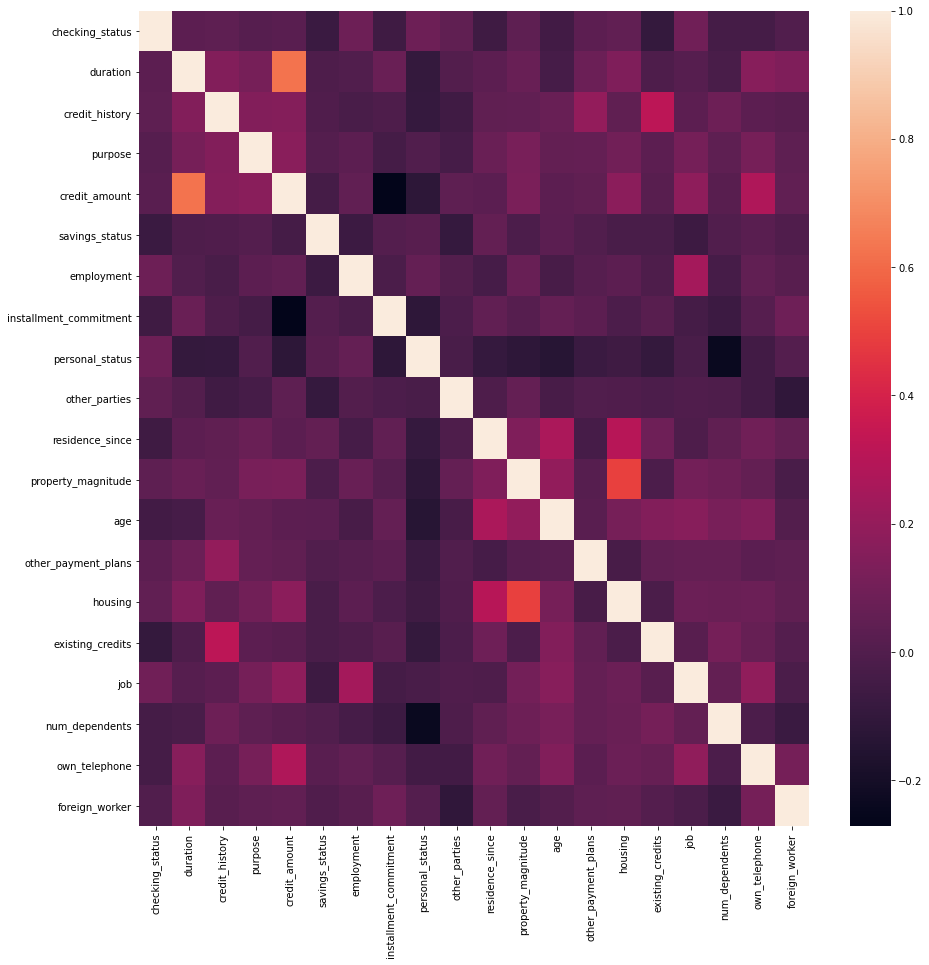

In [114]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(df.corr())

In [115]:
#5. build a machine learning algorithm using any of the classifier and the score should be from 0.78 above

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   int64 
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   int64 
 3   purpose                 1000 non-null   int64 
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   int64 
 6   employment              1000 non-null   int64 
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   int64 
 9   other_parties           1000 non-null   int64 
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   int64 
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   int64 
 14  housing                 1000 non-null   int64 
 15  exist

In [117]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,2,6,2,1,1169,2,2,4,1,1,...,2,67,1,1,2,1,1,2,2,good
1,3,48,1,1,5951,1,1,2,2,1,...,2,22,1,1,1,1,1,1,2,bad
2,1,12,2,6,2096,1,3,2,1,1,...,2,49,1,1,1,2,2,1,2,good
3,2,42,1,3,7882,1,3,2,1,2,...,3,45,1,3,1,1,2,1,2,good
4,2,24,3,2,4870,1,1,3,1,1,...,4,53,1,3,2,1,2,1,2,bad


In [118]:
x=df.drop('class',axis =1)
y = df['class']

In [119]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3, random_state=1)

In [120]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [121]:
tree.score(x_test, y_test)

0.69

In [122]:
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [123]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3, random_state=1)

In [124]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors= 30)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [125]:
knn.score(x_test, y_test)

0.7166666666666667

In [126]:
pred= knn.predict(x_test)
pred

array(['good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good

In [127]:
from sklearn.metrics import confusion_matrix, classification_report
print (confusion_matrix(y_test, pred))

[[  4  82]
 [  3 211]]


In [128]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

         bad       0.57      0.05      0.09        86
        good       0.72      0.99      0.83       214

    accuracy                           0.72       300
   macro avg       0.65      0.52      0.46       300
weighted avg       0.68      0.72      0.62       300

